In [236]:
import numpy as np
import matplotlib.pyplot as plt
from Functions import *
import pandas as pd

In [237]:
axis_font = {'fontname':'Arial', 'size':'16'}
%matplotlib inline

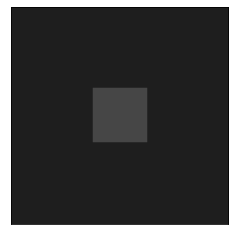

In [238]:
background = 30
b_object = 70
square_img = np.ones((400,400)) * background
square_img[150:250,150:250] = b_object
ShowGrayImg(square_img)

הגדרנו כאן מטריצת אחדים בגודל אן על אן  וכפלנו אותה בגוון הרצוי של הרקע. לאחר מכן, בריבוע ספציפי בתוך המטריצה שהגדרנו( שהיא הרקע) שינינו את הגוון לגוון של הריבוע הפנימי(ראשית הצירים היא הפינה השמאלית העליונה יחסית לרקע). נשים לב שסדר הפרמטרים הוא קודם השורות ואז העמודות

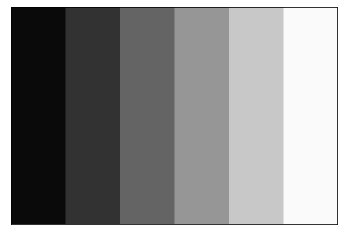

In [239]:
strips = StripesUnit8((200,300),(200,50),6,[10 ,50 ,100, 150, 200 ,250])
ShowGrayImg(strips)

1.3.1

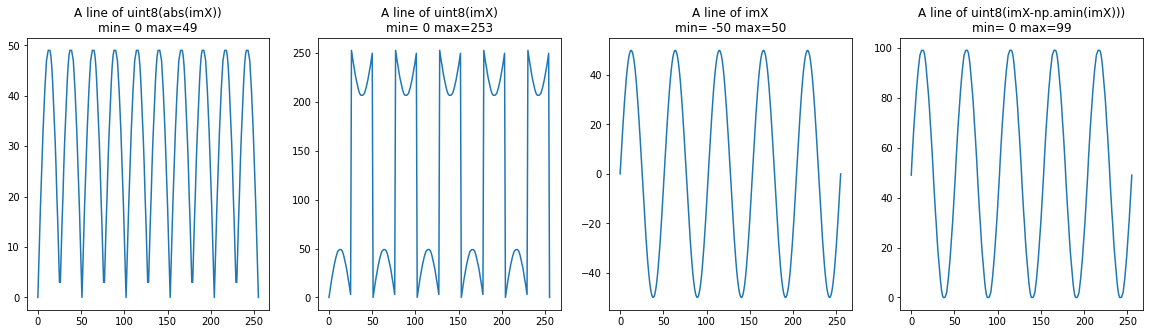

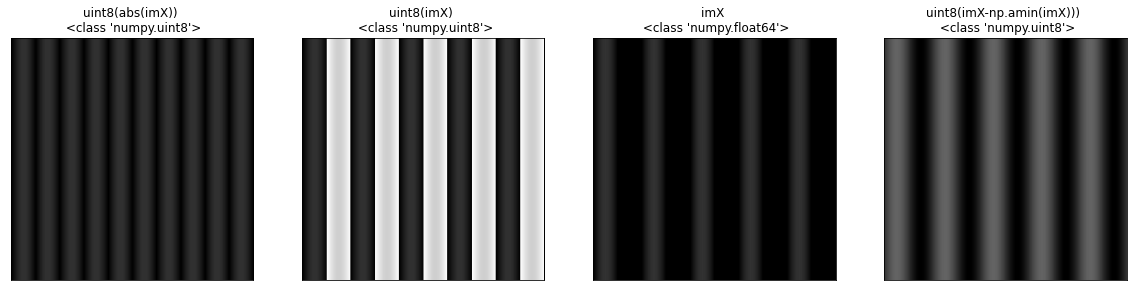

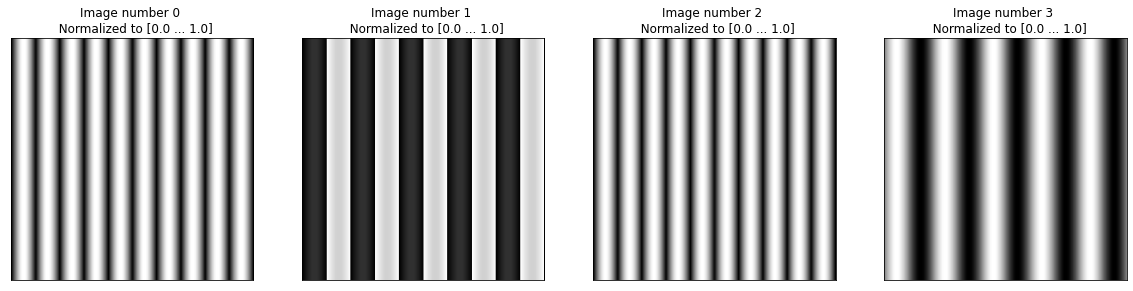

In [240]:
N=256 ; Fs=N; Ts=1/Fs; fx=5; X=[i for i in range(N)]
t = np.linspace(0,1,N)
titleKind = ["uint8(abs(imX))","uint8(imX)","imX","uint8(imX-np.amin(imX)))"]
line = 50*np.sin(2* np.pi * fx *t)
imX = np.array([line] * N)
fig1 , sinSubPlot = plt.subplots(1,4,figsize=[20,5])
fig2 , imageSubPlot1 = plt.subplots(1,4,figsize=[20,5])
fig3 , imageSubPlot2 = plt.subplots(1,4,figsize=[20,5])
for i in range(0 , 4):
    matrix = AlocateMatrix(i,imX)
    sinSubPlot[i].set_title("A line of " + titleKind[i] + "\n" + "min= " + str(round(np.amin(matrix))) + " max=" + str(round(np.amax(matrix))) )
    sinSubPlot[i].plot(X,matrix[0])
    imageSubPlot1[i].imshow(matrix,cmap='gray', vmin=0, vmax=255)
    imageSubPlot1[i].set_title(f"{titleKind[i]} \n {type(matrix[0][0])}")
    imageSubPlot2[i].set_title(f"Image number {i} \n  Normalized to [0.0 ... 1.0]")
    imageSubPlot2[i].imshow(np.dot(1/np.amax(matrix),np.abs(matrix)),cmap='gray', vmin=0.0, vmax=1.0)
    fig2.axes[i].get_xaxis().set_visible(False)
    fig2.axes[i].get_yaxis().set_visible(False)
    fig3.axes[i].get_xaxis().set_visible(False)
    fig3.axes[i].get_yaxis().set_visible(False)
fig1.show()

fig2.show()
fig3.show()

1.3.2

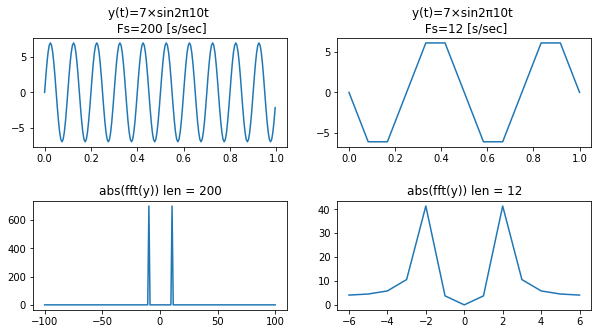

In [241]:
f=10 ; A= 7 ; fs= 200; N1 = fs; L=1 ; Ts = 1/fs; t = np.dot(1/fs,[i for i in range(N1)])

sinFunc= A*np.sin(2*np.pi*f*t)
fy1_shifted = np.abs(np.fft.fftshift(np.fft.fft(sinFunc)))

fig1 , sinSubPlot1 = plt.subplots(2,2,figsize=[10,5])
sinSubPlot1[0][0].set_title(f"y(t)={A}\u00d7sin2\u03c0{f}t \n Fs={fs} [s/sec]")
sinSubPlot1[0][0].plot(t,sinFunc)

sinSubPlot1[1][0].plot(np.linspace(-N1/2,N1/2,N1),fy1_shifted)
sinSubPlot1[1][0].set_title(f"abs(fft(y)) len = {N1}")
#*******initialization********#
fs = 12
N1 = fs
t = np.dot(1/fs,[i for i in range(0,N1+1)])
#*****************************#

sinFunc= A*np.sin(2*np.pi*f*t)
fy1_shifted = np.abs(np.fft.fftshift(np.fft.fft(sinFunc)))

sinSubPlot1[0][1].plot(t,sinFunc)
sinSubPlot1[1][1].plot(np.linspace(-N1/2,N1/2,N1+1),fy1_shifted)
sinSubPlot1[0][1].set_title(f"y(t)={A}\u00d7sin2\u03c0{f}t \n Fs={fs} [s/sec]")
sinSubPlot1[1][1].set_title(f"abs(fft(y)) len = {N1}")
plt.subplots_adjust(hspace=0.5)

fig1.show()


1.3.5.

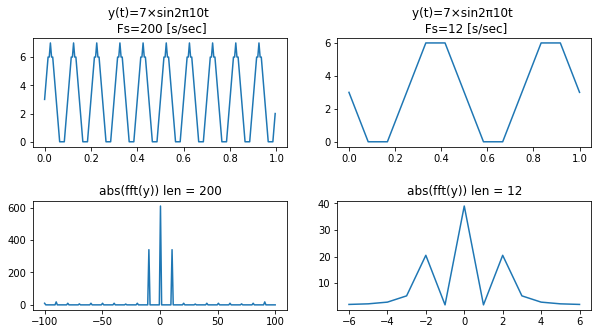

In [242]:
f=10 ; A= 7 ; fs= 200; N1 = fs; L=1 ; Ts = 1/fs; t = np.dot(1/fs,[i for i in range(N1)])

sinFunc= np.uint8(A/2*np.sin(2*np.pi*f*t)-(-A/2))
fy1_shifted = np.abs(np.fft.fftshift(np.fft.fft(sinFunc)))

fig1 , sinSubPlot1 = plt.subplots(2,2,figsize=[10,5])
sinSubPlot1[0][0].set_title(f"y(t)={A}\u00d7sin2\u03c0{f}t \n Fs={fs} [s/sec]")
sinSubPlot1[0][0].plot(t,sinFunc)

sinSubPlot1[1][0].plot(np.linspace(-N1/2,N1/2,N1),fy1_shifted)
sinSubPlot1[1][0].set_title(f"abs(fft(y)) len = {N1}")
#*******initialization********#
fs = 12
N1 = fs
t = np.dot(1/fs,[i for i in range(0,N1+1)])
#*****************************#

sinFunc= np.uint8(A/2*np.sin(2*np.pi*f*t)-(-A/2))
fy1_shifted = np.abs(np.fft.fftshift(np.fft.fft(sinFunc)))

sinSubPlot1[0][1].plot(t,sinFunc)
sinSubPlot1[1][1].plot(np.linspace(-N1/2,N1/2,N1+1),fy1_shifted)
sinSubPlot1[0][1].set_title(f"y(t)={A}\u00d7sin2\u03c0{f}t \n Fs={fs} [s/sec]")
sinSubPlot1[1][1].set_title(f"abs(fft(y)) len = {N1}")
plt.subplots_adjust(hspace=0.5)

fig1.show()

יצרנו שני סינוסים, כאשר במקרה אחד הם היו מסוג double, ובמקרה שני הם מסוג משתנה שלם unsigned. במרה  שהם היו מסוג double, ניתן לראות שעבור הסינוס הראשון (F_s=200 Hz) אנו עומדים בתנאי נייקויסט מפני שתדר הדגימה (F_s=200 Hz) גדול משמעותית מפעמיים תדר הסינוס שהוא 10Hz. לכן, אנו מקבלים סינוס ללא עיוותים, כמו כן התמרת הפורייה המתקבלת מורכבת משתי פונקציות בצורת הלמים בתדרים 10 ו- 10- (לפי המצופה מהתמרת פורייה של סינוס) כלומר, מקרה זה תואם את המצב האידאלי.

 לעומת זאת, עבור הסינוס שנדגם בתדר 12Hz, תנאי נייקויסט אינו מתקיים מאחר ו-12 קטן מפעמיים תדר הסינוס (10Hz). מזה ניתן לראות שבמישור הזמן הסינוס לא נראה כמו סינוס, וישנם מעוות. עיוותים אלה נוצרים כתוצאה      מ-aliasing  (מאחר ותנאי נייקויסט אינו מתקיים, נוצרים שכפולים חופפים). 

בגלל ה- aliasing   נוצרים רכיבי תדר שאינם רצויים שנראים בהתמרת הפורייה של האות. כדי ליצור את הסינוס כמשתנה שלם unsigned (בין 0 ל255) , חילקנו את האמפליטודה המתקבלת מהפונקציה ב-2, הכפלנו בסינוס והוספנו היסט באותו גודל. כל זאת עשינו על מנת לקבל סינוס לא קטוע בתחום ערכים חיובי (מ- 0 עד האמפליטודה שהתקבלה לפונקציה). לאח מכן בצענו המרה למשתנה שלם unsigned.

נצפה לקבל סינוס הרוכב על רמת היסט במישור הזמן (עבור הסינוס שנדגם F_s=200 Hz העומד בתנאי נייקויסט) ועבור הסינוס שנדגם בתדר 12 הרץ נצפה לראות עיוותים כמו בגלל שעדיין קיימת תופעת ה- aliasing . כמו כן, עבור התדר שמקיים את תנאי נייקויסט נצפה לראות הרמוניה בתדר 0 (רכיבי התדר של ההיסט שהופנו לסינוס), בתדר שאינו מקיים את תנאי נייקויסט נצפה לראות שם עיוות נוסף. 

ניתן לראות שלא קיבלנו את מה שציפינו לקבל, עבור הסינוס שנדגם בתדר שמקיים את תנאי נייקויסט נוצרו עיוותים במישור הזמן, אשר הפכו להרמוניות קטנות בתדר. הסיבה לכך היא שכתוצאה מההמרה למשתנה שלם unsigned  בעל 8 סיביות אבד המידע הנוגע לערכים לא שלמים אשר יכולים יכולים להופיע בסינוס.



Here need to put theoretical of one demendion convolution

In [243]:
x = np.array([1,2,3,1,2])
h = np.array([1,1])
y = np.convolve(x,h)
print("y[n]=",y)

y[n]= [1 3 5 4 3 2]


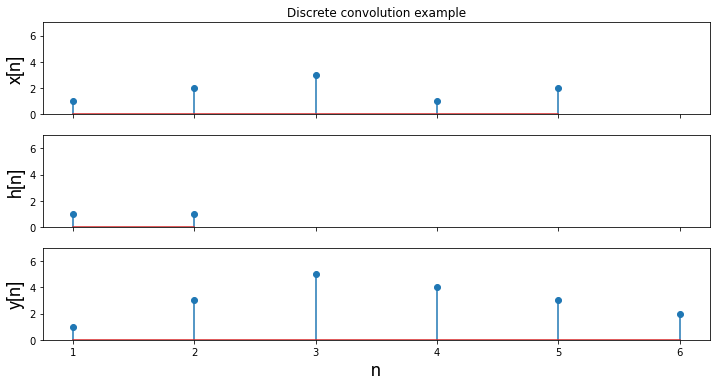

In [244]:
PlotingDiscreteConvolution(x,h,y,titile="Discrete convolution example")

Some Explenation need insert here :P

In [245]:
x2 = np.array([i for i in range(1,9)])
h2 = np.array([0,0,1])
y2 = np.convolve(x2,h2)
print("y[n]=",y2)

y[n]= [0 0 1 2 3 4 5 6 7 8]


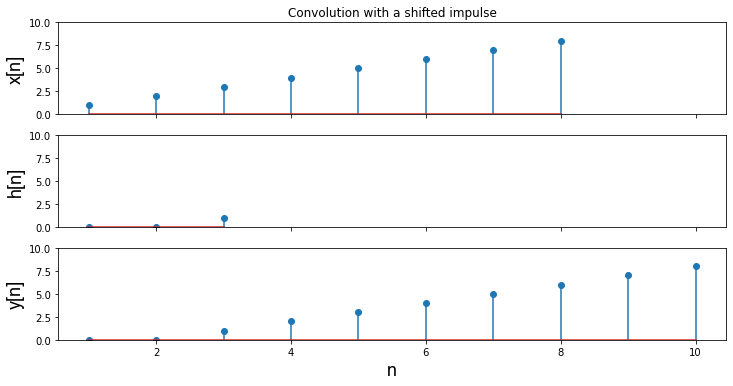

In [246]:
PlotingDiscreteConvolution(x2,h2,y2,titile="Convolution with a shifted impulse")

And here explanation missing

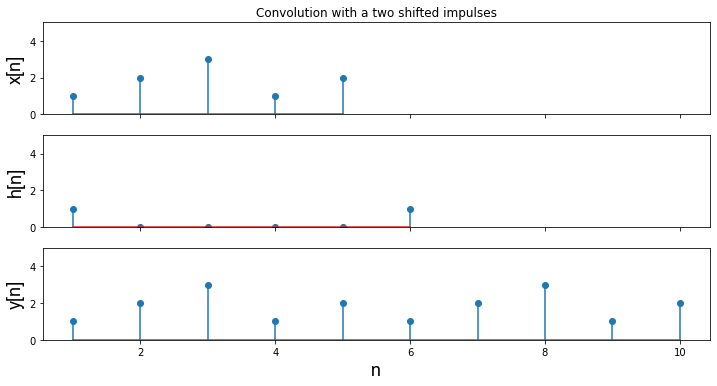

In [247]:
h3=np.ones(6,dtype="int16"); h3[1:-1] = 0
x3 = np.array([1,2,3,1,2])
y3 = np.convolve(x3,h3)
PlotingDiscreteConvolution(x3,h3,y3,titile="Convolution with a two shifted impulses")

placeholder for explanation

1.4.3

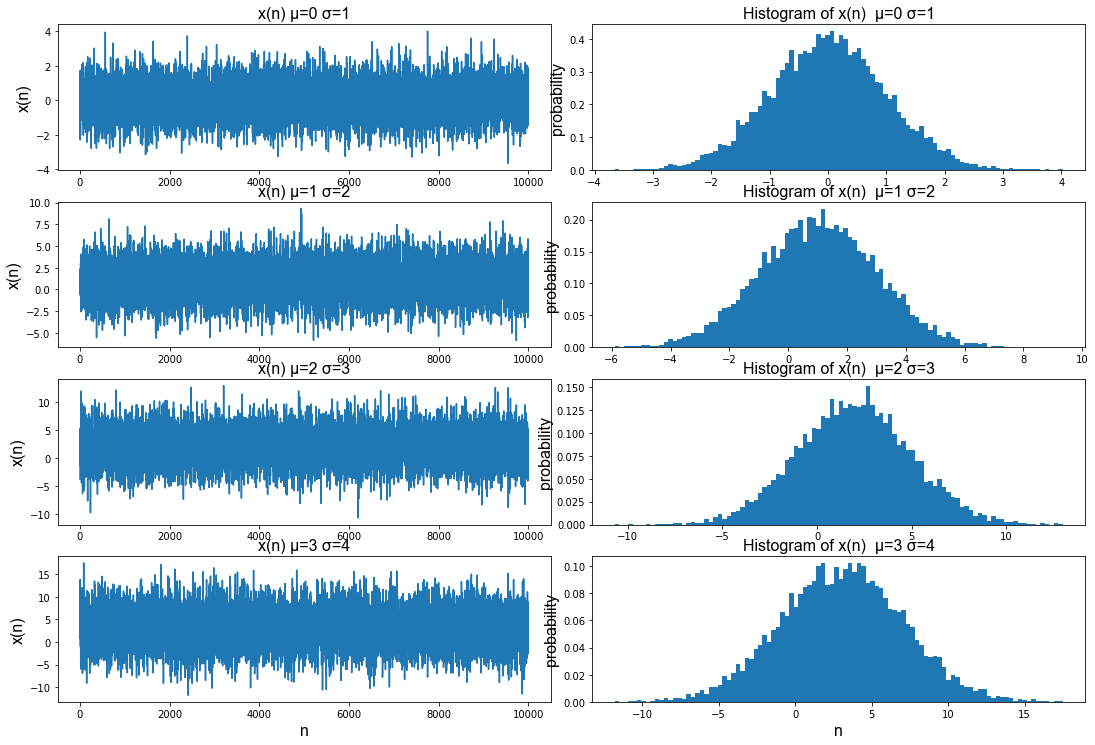

In [250]:
lenght = 10000
np.random.seed(1)
gausianNoiseFig , plotsList = plt.subplots(4,2,figsize=[15,10])
plt.tight_layout()
for i in range(0,4):
    gaussianLine = np.random.normal(i,i+1,lenght)
    plotsList[i,0].set_title(f"x(n) \u03BC={i} \u03C3={i+1}",**axis_font)
    plotsList[i,1].set_title(f"Histogram of x(n)  \u03BC={i} \u03C3={i+1}",**axis_font)
    plotsList[i,0].set_ylabel("x(n)",**axis_font)
    plotsList[i,1].set_ylabel("probability",**axis_font)
    plotsList[i,0].plot([i for i in range(lenght)],gaussianLine)
    plotsList[i,1].hist(gaussianLine,bins=100,density=True,stacked=True)
plotsList[3,0].set_xlabel("n",**axis_font)
plotsList[3,1].set_xlabel("n",**axis_font)
gausianNoiseFig.show()

1.4.4

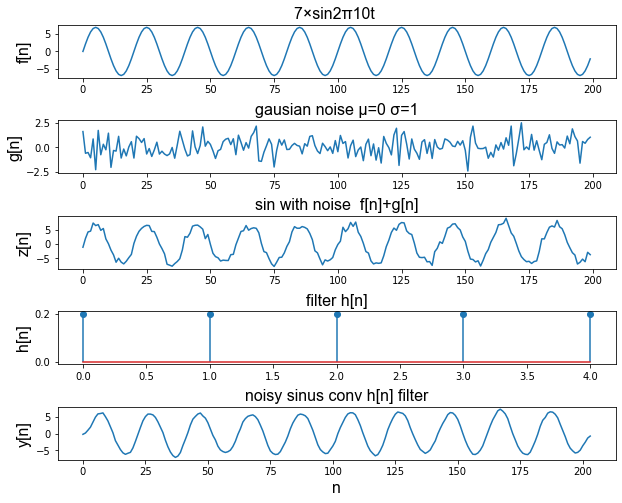

In [252]:
f=10 ; A= 7 ; fs= 200; N1 = fs; L=1 ; Ts = 1/fs; t = np.arange(0,L,1/fs);np.random.seed(1)
sinSampled = A*np.sin(2*np.pi*f*t) 
gausianNoise = np.random.normal(0,1,L*fs)
sinWithNoise = sinSampled + gausianNoice
filterArray = np.full(5,0.2)
sinFiltered = np.convolve(sinWithNoise,filterArray)
figNoicySin , axisList = plt.subplots(5,1,figsize=[10,8])
listOfYlabels = ["f[n]","g[n]","z[n]","h[n]","y[n]"]
listOfPlots = [sinSampled,gausianNoise,sinWithNoise,filterArray,sinFiltered]
plt.subplots_adjust(hspace=0.8)
axisList[0].set_title(f"{A}\u00d7sin2\u03c0{f}t ",**axis_font)
axisList[1].set_title(f"gausian noise \u03BC={0} \u03C3={1}",**axis_font)
axisList[2].set_title(f"sin with noise  f[n]+g[n]",**axis_font)
axisList[3].set_title(f"filter h[n]",**axis_font)
axisList[4].set_title(f"noisy sinus conv h[n] filter",**axis_font)
axisList[4].set_xlabel("n",**axis_font)
index = 0
for subplot in axisList :
    subplot.set_ylabel(listOfYlabels[index],**axis_font)
    if(index == 3):
        subplot.stem(listOfPlots[index])
    else:
        subplot.plot(listOfPlots[index])
    index+=1
